<a href="https://colab.research.google.com/github/aashutoshkumarbhardwaj/today1/blob/master/day25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/wine_data.csv')
df.head()
df.iloc[:,0:3]

<Axes: xlabel='alcohol', ylabel='Density'>

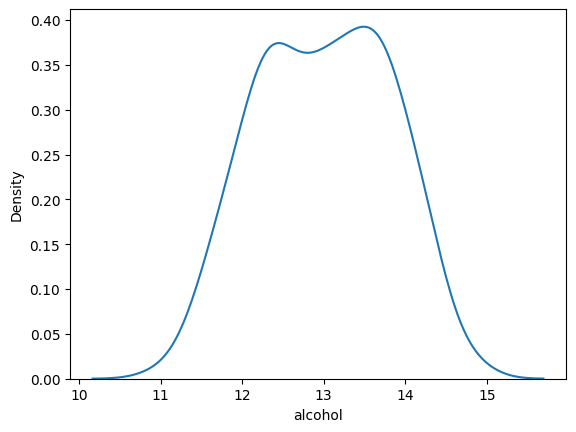

In [17]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic_acid', ylabel='Density'>

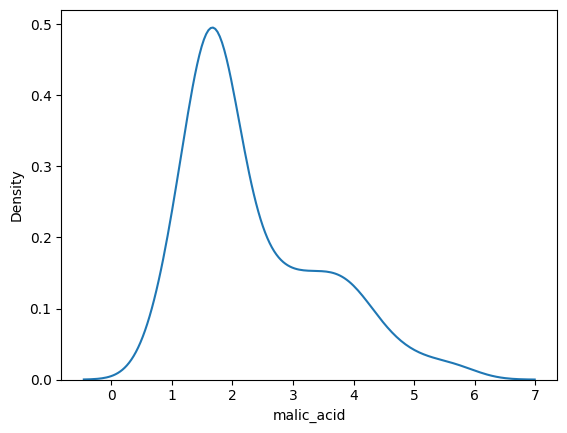

In [18]:
sns.kdeplot(df['malic_acid'])

In [24]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(df['alcohol'],df['malic_acid'],hue=df['Class label'], palette=color_dict)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [26]:
from sklearn.model_selection import train_test_split
# Assuming 'class_label' is the actual column name
x_train, x_test, y_train, y_test = train_test_split(df[['class_label']], df.drop(columns=['class_label']), test_size=0.2, random_state=0)
# Changed df['Class label'] to df[['class_label']] to pass a DataFrame to train_test_split
# Added df.drop(columns=['class_label']) to select all columns except 'class_label' for features
x_train.shape, x_test.shape

((142, 1), (36, 1))

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scalaed = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
x_train = pd.DataFrame(x_train, columns=['class_label']) # Assuming 'class_label' is your desired column name
x_test = pd.DataFrame(x_test, columns=['class_label'])

In [33]:
np.round(x_train.describe(), 2)

,class_label
count,142.00
mean,0.49
std,0.39
min,0.00
25%,0.00
50%,0.50
75%,1.00
max,1.00


In [43]:
np.round(x_test.describe(), 2)

,class_label
count,36.00
mean,0.39
std,0.36
min,0.00
25%,0.00
50%,0.50
75%,0.50
max,1.00


KeyError: 'Alcohol'

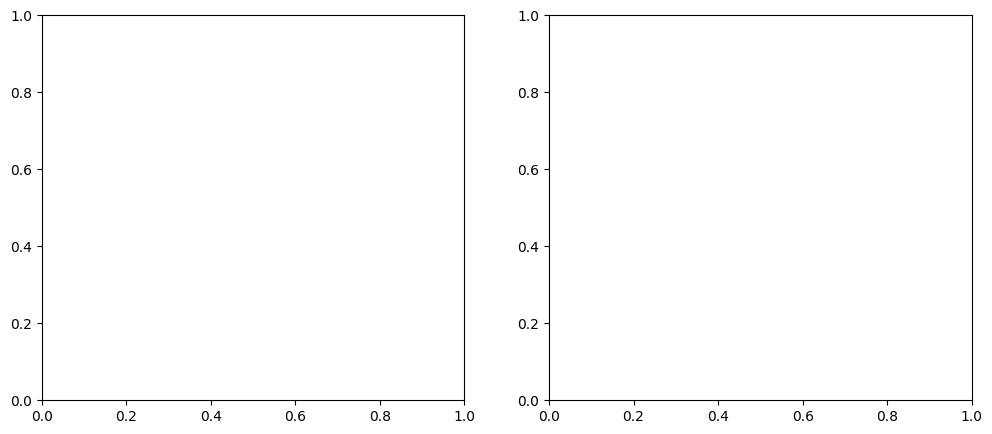

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Alcohol'],x_train['malic_acid'],c=y_train)
ax1.set_title('before Data')
ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic_acid'],c=y_test)
ax2.set_title('after Data')
plt.show()

KeyError: 'alcohol'

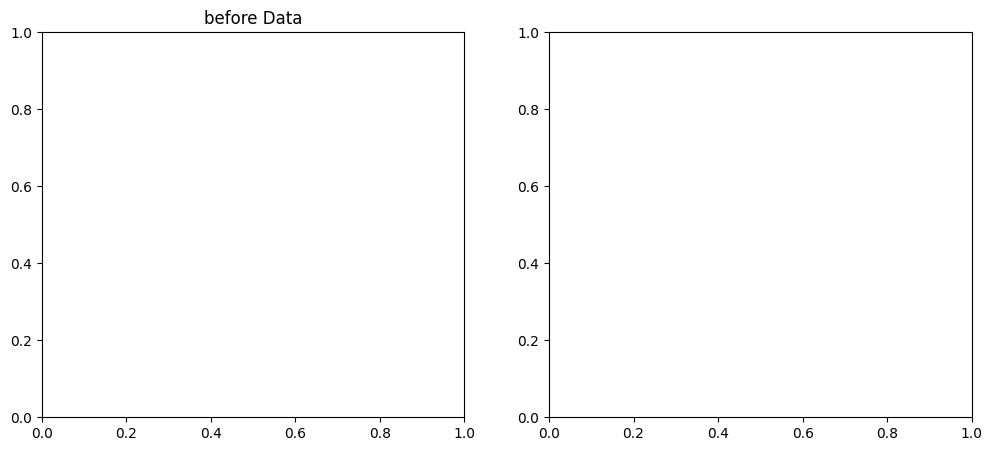

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before Data')
sns.kdeplot(x_train['alcohol'],ax=ax1)
sns.kdeplot(x_train['malic_acid'],ax=ax1)
ax2.set_title('after Data')
sns.kdeplot(x_train_scaled['alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['malic_acid'],ax=ax2)
plt.show()